# Quick Start

We use the Iris dataset from RDatasets.jl to demonstrate the basic usage of Coefplots.jl

In [1]:
include("../src/Coefplots.jl")
using .Coefplots
# using Coefplots
using RDatasets
using GLM
using DataFrames

df = dataset("datasets", "iris"); 

## Example 1
You can plot the regression directly using `plot()`. The plot is saved if a filename is provided.

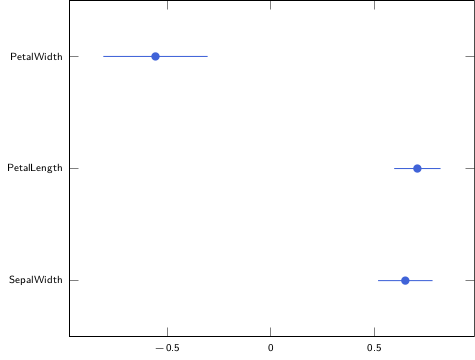

In [2]:
# Example 1
ols1 = lm(@formula(SepalLength ~ SepalWidth + PetalLength + PetalWidth), df)

# plot
plot(ols1)
# plot(ols1,"path/to/my/plot")

## Example 2
You can also convert the regression model into a Coefplot object, then add other attributes of the plot using `setxtitle!()`, `setytitle!()`, `setname!()`, `includenote!()` before you plot your regression.

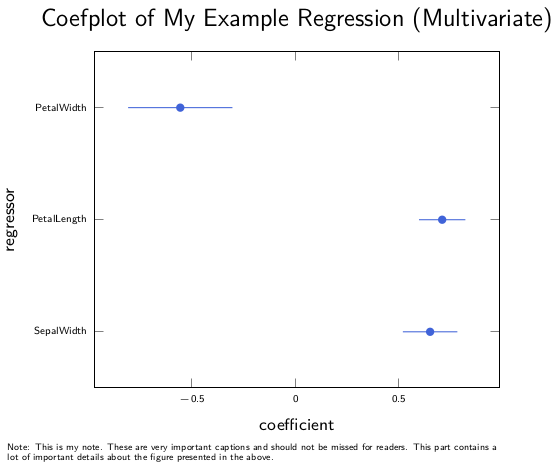

In [3]:
# Example 2
coefplot = Coefplots.parse(ols1)
setxtitle!(coefplot,"coefficient")
setytitle!(coefplot,"regressor")
setname!(coefplot,"Coefplot of My Example Regression (Multivariate)")
includenote!(coefplot,"Note: This is my note. These are very important captions and should not be missed for readers. This part contains a lot of important details about the figure presented in the above.")
plot(coefplot)

## Example 3
To combine results from multiple coefplots and plot them in one Coefplot, use the command `concat()`

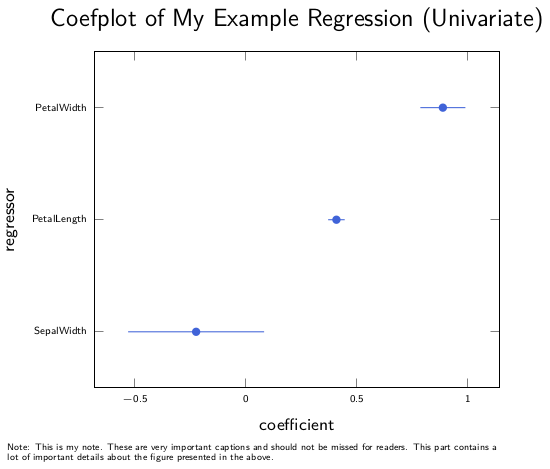

In [4]:
# Example 3
uni1 = lm(@formula(SepalLength~SepalWidth), df)
uni2 = lm(@formula(SepalLength~PetalLength), df)
uni3 = lm(@formula(SepalLength~PetalWidth), df)

coefplot_bivar = Coefplots.concat(Coefplots.parse.([uni1,uni2,uni3]))
setxtitle!(coefplot_bivar,"coefficient")
setytitle!(coefplot_bivar,"regressor")
setname!(coefplot_bivar,"Coefplot of My Example Regression (Univariate)")
includenote!(coefplot_bivar,"Note: This is my note. These are very important captions and should not be missed for readers. This part contains a lot of important details about the figure presented in the above.")
plot(coefplot_bivar)

## Example 4
To plot multiple coefplots together as a MultiCoefplot, construct the MultiCoefplot object using `MultiCoefplot()`. `setxtitle!()`, `setytitle!()`, `setname!()`, `includenote!()` is also available for MultiCoefplot object. `setlegends!()` is useful in setting the caption of the legends. 

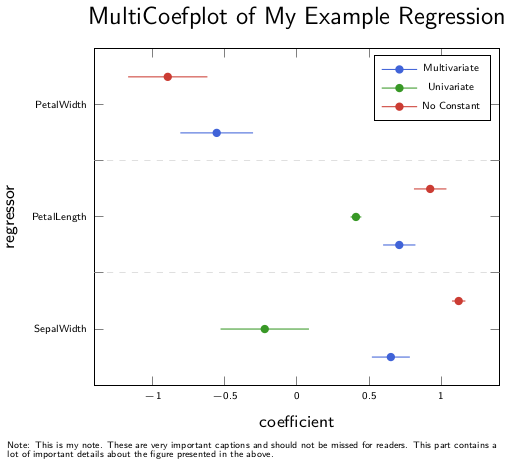

In [5]:
# Example 4
# ols3 is ols1 but without constant
ols3 = lm(@formula(SepalLength ~ SepalWidth + PetalLength + PetalWidth + 0), df)
coefplot_nocons = Coefplots.parse(ols3)

mcoefplot = Coefplots.MultiCoefplot(:model1 => coefplot, :model2 => coefplot_bivar, :model3 => coefplot_nocons)
setxtitle!(mcoefplot,"coefficient")
setytitle!(mcoefplot,"regressor")
setname!(mcoefplot,"MultiCoefplot of My Example Regression")
includenote!(mcoefplot,"Note: This is my note. These are very important captions and should not be missed for readers. This part contains a lot of important details about the figure presented in the above.")

setlegends!(mcoefplot, :model1 => "Multivariate", :model2 => "Univariate", :model3 => "No Constant")
plot(mcoefplot)

## Example 5
You can also add `PGFPlotsX.TikzElement` using their `@pgf` macro. The supported TikzElements now are limited to `HLine`, `HBand`, `VLine`, `VBand`.

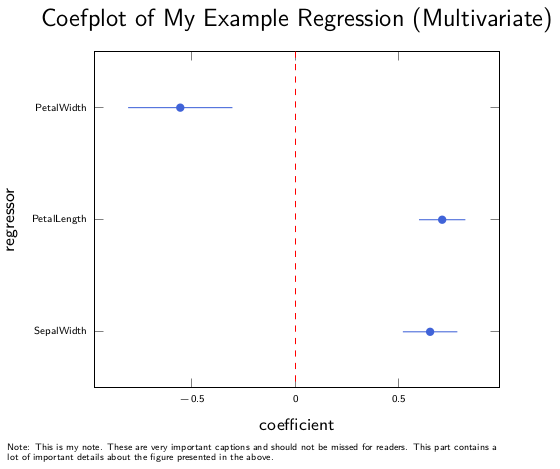

In [6]:
# Example 5
# Add PGFPlotsX TikzElement using their @pgf macro
using PGFPlotsX
addcomponent!(coefplot, @pgf VLine({red, dashed},0)) # add a vertical line red dashed line
plot(coefplot)

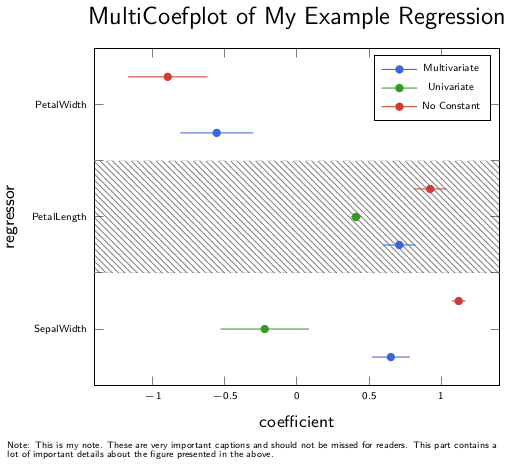

In [7]:
push!(Coefplots.PGFPlotsX.CUSTOM_PREAMBLE, "\\usetikzlibrary{patterns}")
addcomponent!(mcoefplot, @pgf HBand({pattern = "north west lines", opacity = 0.5, draw = "none"}, 1.5, 2.5)) # add a horizontal band from y=1 to y=2
plot(mcoefplot)